# t-SNE Lab 2

## 1. Introduction


### Intro and objectives


### In this lab you will learn:
1. A basic example of t-SNE
### What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 2. Load and check data
### 2.1 Let's load the MNIST dataset

#### We only load the first 10000 instances

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:10000], mnist.target[:10000]


In [6]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

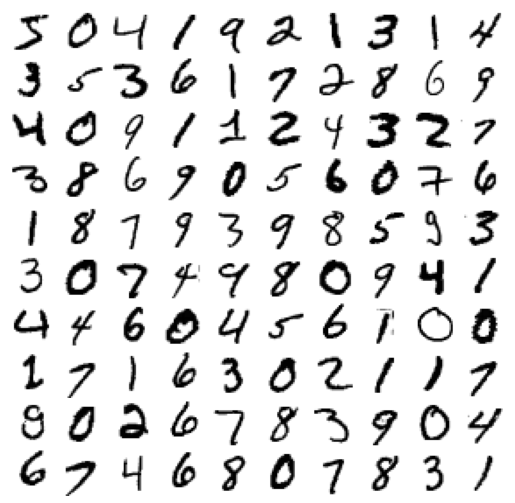

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

## 3. Let's apply t-SNE

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
%time X_reduced = tsne.fit_transform(X_train)

CPU times: user 3min 9s, sys: 304 ms, total: 3min 9s
Wall time: 1min 54s


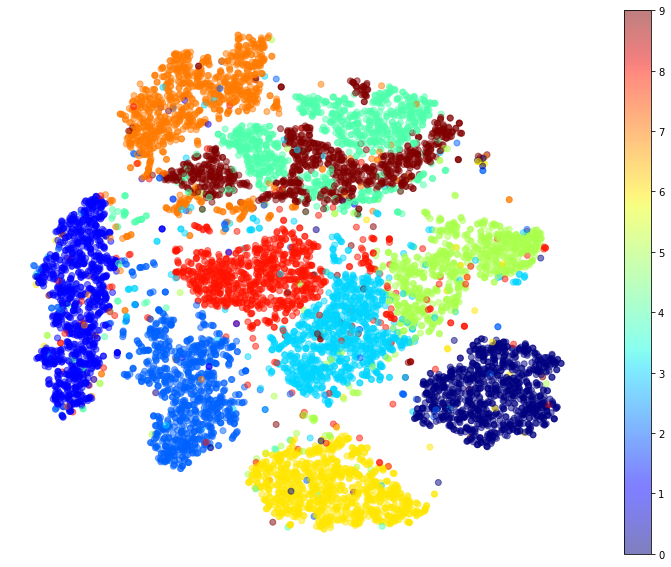

In [12]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_train.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

#### Most digits are nicely separated from the others, even though t-SNE wasn't given the targets: it just identified clusters of similar images. But there is still a bit of overlap. For example, the 3s and the 5s overlap a lot (on the right side of the plot), and so do the 4s and the 9s (in the top-right corner).

## 3.1. Let's focus on digits 4 and 9

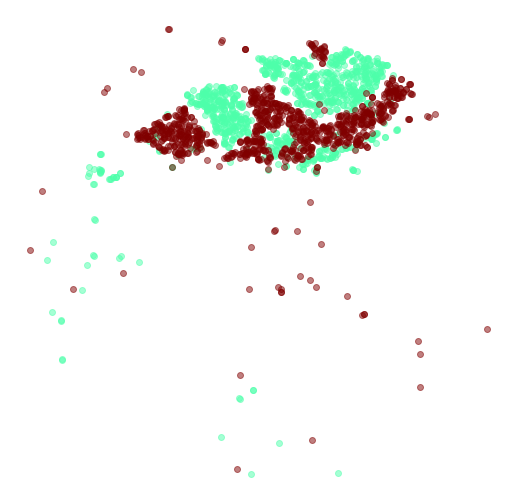

In [14]:
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[y_train == digit, 0], X_reduced[y_train == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

#### We observe that there exists significant overlap

## 3.2. Let's run t-SNE on these two digits only

In [20]:
idx = (y_train == '4') | (y_train == '9')
X_subset = X_train[idx]
y_subset = y_train[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto"
                   )
X_subset_reduced = tsne_subset.fit_transform(X_subset)

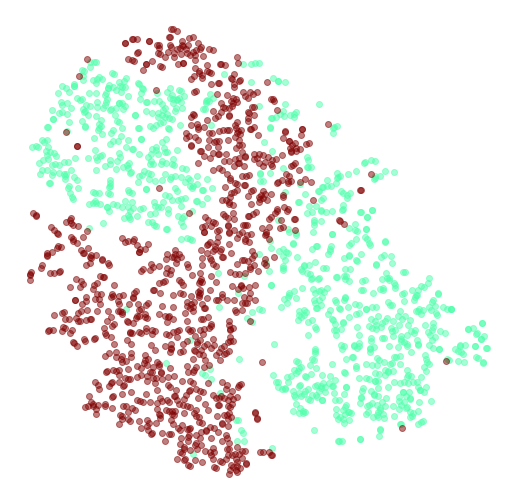

In [21]:
plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

#### That's much better, although there's still a bit of overlap. Perhaps some 4s really do look like 9s, and vice versa